In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from time import time

In [4]:
(train_data, train_labels), (test_data, test_labels) =imdb.load_data(num_words=10000)

/home/roberto/anaconda3/envs/tf_no_gpu/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/roberto/anaconda3/envs/tf_no_gpu/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
len(train_labels)

25000

In [7]:
len(test_data)

25000

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
len(imdb.get_word_index())

88584

In [10]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [14]:
len(decoded_review)

1113

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype='float32')
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels ).astype('float32')

print (x_train.dtype, y_train.dtype)


float32 float32


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
def timeit(some_func):
    
    i = time()
    return some_func(), time() -i

timeit(lambda : print ('hi'))

hi


(None, 0.00010061264038085938)

In [18]:
def run_model(model):
    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

    history_dict = history.history
    
    print ('History keys: ', history.history.keys())
    
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) +1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    acc = history_dict['accuracy']
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    val_acc = history_dict['val_accuracy']
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    results, t= timeit(lambda : model.evaluate(x_test, y_test))
    print('Evaluation: ', results, t)

    r, t = timeit(lambda: model.predict(x_test))
    print ('Tests predict: ', r, t)

Epoch 1/20
30/30 [==============================] - 2s 72ms/step - loss: 0.5779 - accuracy: 0.7462 - val_loss: 0.4635 - val_accuracy: 0.8571
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3780 - accuracy: 0.8983 - val_loss: 0.3508 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2717 - accuracy: 0.9199 - val_loss: 0.3069 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2090 - accuracy: 0.9391 - val_loss: 0.2892 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1724 - accuracy: 0.9490 - val_loss: 0.2875 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1405 - accuracy: 0.9584 - val_loss: 0.2924 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1170 - accuracy: 0.9649 - val_loss: 0.2956 - val_accuracy: 0.8854
Epoch 8/20
30

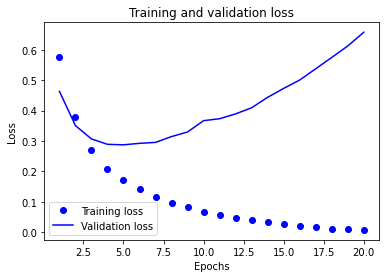

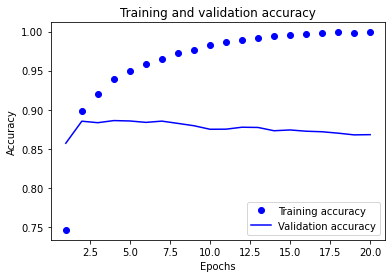

782/782 [==============================] - 25s 32ms/step - loss: 0.7011 - accuracy: 0.8543
Evaluation:  [0.7011417746543884, 0.8543199896812439] 25.525967836380005
Tests predict:  [[0.0125998 ]
 [1.        ]
 [0.9878744 ]
 ...
 [0.00332537]
 [0.02370289]
 [0.8708174 ]] 19.309180974960327


In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

run_model(model)

Epoch 1/20
30/30 [==============================] - 2s 65ms/step - loss: 0.5383 - accuracy: 0.7682 - val_loss: 0.4034 - val_accuracy: 0.8557
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3069 - accuracy: 0.8983 - val_loss: 0.2997 - val_accuracy: 0.8901
Epoch 3/20
30/30 [==============================] - 2s 69ms/step - loss: 0.2158 - accuracy: 0.9282 - val_loss: 0.2766 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1696 - accuracy: 0.9444 - val_loss: 0.3211 - val_accuracy: 0.8723
Epoch 5/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1383 - accuracy: 0.9557 - val_loss: 0.3133 - val_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1127 - accuracy: 0.9638 - val_loss: 0.3062 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 2s 65ms/step - loss: 0.0907 - accuracy: 0.9733 - val_loss: 0.3300 - val_accuracy: 0.8808
Epoch 8/20
30

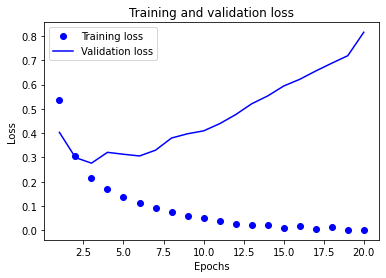

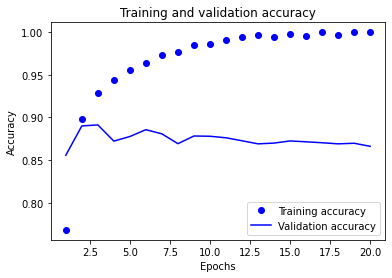

782/782 [==============================] - 25s 32ms/step - loss: 0.8801 - accuracy: 0.8518
Evaluation:  [0.8801277279853821, 0.8518400192260742] 28.143521785736084
Tests predict:  [[0.00344297]
 [1.        ]
 [0.83140033]
 ...
 [0.00205943]
 [0.01185516]
 [0.83512485]] 8.16316533088684


In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

run_model(model)

Epoch 1/20
30/30 [==============================] - 2s 68ms/step - loss: 0.4919 - accuracy: 0.7793 - val_loss: 0.3905 - val_accuracy: 0.8423
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2656 - accuracy: 0.9105 - val_loss: 0.3210 - val_accuracy: 0.8656
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1940 - accuracy: 0.9329 - val_loss: 0.3847 - val_accuracy: 0.8430
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1497 - accuracy: 0.9497 - val_loss: 0.2898 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1224 - accuracy: 0.9585 - val_loss: 0.3282 - val_accuracy: 0.8730
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0940 - accuracy: 0.9697 - val_loss: 0.3348 - val_accuracy: 0.8769
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0745 - accuracy: 0.9773 - val_loss: 0.3512 - val_accuracy: 0.8790
Epoch 8/20
30

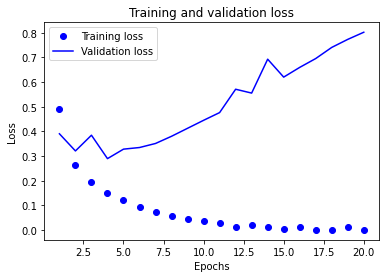

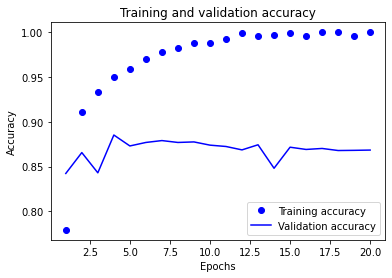

782/782 [==============================] - 17s 21ms/step - loss: 0.8709 - accuracy: 0.8514
Evaluation:  [0.8708520531654358, 0.851360023021698] 16.993364334106445
Tests predict:  [[0.00168386]
 [1.        ]
 [0.9999817 ]
 ...
 [0.00156707]
 [0.00681728]
 [0.21021375]] 2.1108267307281494


In [17]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

run_model(model)

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1736 - accuracy: 0.7951 - val_loss: 0.1254 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0951 - accuracy: 0.9036 - val_loss: 0.1000 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0685 - accuracy: 0.9279 - val_loss: 0.0918 - val_accuracy: 0.8807
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0535 - accuracy: 0.9442 - val_loss: 0.0857 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0431 - accuracy: 0.9555 - val_loss: 0.0821 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0347 - accuracy: 0.9661 - val_loss: 0.0879 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0294 - accuracy: 0.9715 - val_loss: 0.0857 - val_accuracy: 0.8839
Epoch 8/20
30

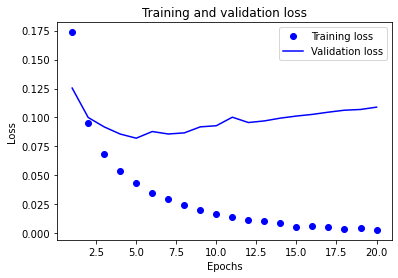

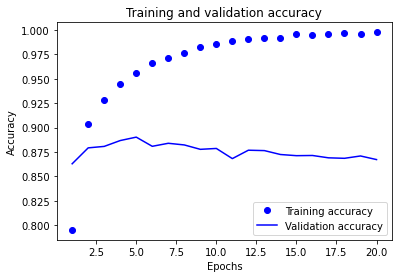

782/782 [==============================] - 15s 19ms/step - loss: 0.1204 - accuracy: 0.8526


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

run_model(model)

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5137 - accuracy: 0.7961 - val_loss: 0.4067 - val_accuracy: 0.8551
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3107 - accuracy: 0.9058 - val_loss: 0.3140 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2181 - accuracy: 0.9332 - val_loss: 0.2825 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1646 - accuracy: 0.9493 - val_loss: 0.2865 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1272 - accuracy: 0.9602 - val_loss: 0.2966 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0991 - accuracy: 0.9715 - val_loss: 0.3296 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0771 - accuracy: 0.9781 - val_loss: 0.3557 - val_accuracy: 0.8800
Epoch 8/20
30

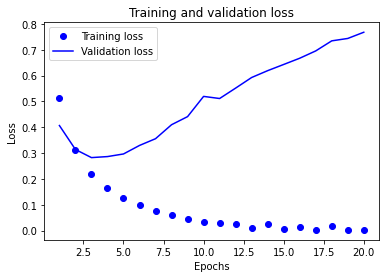

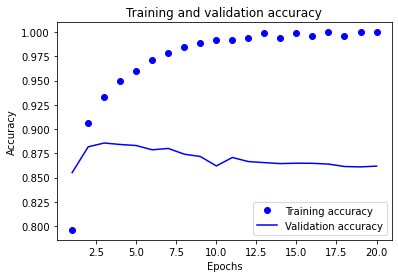

782/782 [==============================] - 16s 21ms/step - loss: 0.8604 - accuracy: 0.8444
Evaluation:  [0.8604349493980408, 0.8443999886512756] 16.315762758255005
Tests predict:  [[1.0176301e-03]
 [9.9988866e-01]
 [9.8285818e-01]
 ...
 [2.1591783e-04]
 [3.2540560e-03]
 [7.1307337e-01]] 3.9786858558654785


In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

run_model(model)